# CREDIT CARD FRAUD DETECTION

The idea behind this study is to compare the credit card transactions and if there is a difference in impact based on location, income and posh/nonposh locality

### Literature Review

Credit Card fraud is a critical issue for any banking firm. It has a huge impact on the customer and the banking firm. It has thus become an important factor to employ fraud detection and preventive measures to eliminate such losses.

The issue with the usage of credit card data is that data is highly skewed wherein the amount of non fradulent transaction is higher in comparison to the amount of fradulent transcation.

To tackle the problem of class imbalance, the data is re-sampled using the Synthetic Minority over-sampling Technique.

The Synthetic Minority over-sampling TEchnique (SMOTE)
is amongst of the most dominant techniques that are used to
address the issue of class imbalance that is found in datasets
such as the ones used to build credit card fraud detection ML - based
models [1].

These SMOTE method when coupled with the Adaptive Boosting (AdaBoost) technique increases the classification quality.

As an ensemble method in machine learning, the
AdaBoost algorithm uses the boosting technique known as
Adaptive Boosting. Each instance is given a new set of
weights, with the greater weights going to instances that were
mistakenly categorised. During the data training process, N
decision trees are generated. Priority is given to the record
that was incorrectly classified during the previous model
during the construction of the first decision tree/model Input
for the second model is limited to the records in the first
record.[2]

Machine Learning plays an important role in efficient data processing of financial data. Several research methods employed supervised, unsupervised, hybrid machine learning models to detect the fradulent transactions. As most transactions are legitimate, for high precision prediction may be obtained without properly identifying the fradulent transaction. [3]


Research on fraud detection of credit card fraud transaction based on SMOTE-GAN is widespread and with several effective models developed over the years to tackle the issue. Maram Alamri and Mourad Ykhlef proposed a credit card fraud detection
method based on sampling techniques [4][5].

Their method involves the use of the SMOTE  algorithm to ensure a balanced representation of positive and negative samples in the training
dataset. It depicts the different sampling techniques and methods of implementation. 
The paper also explains more on the imbalance in the data and their impact on the algorithm performance based on inaccuracies, wrong result and F1 values.
Finally, they discuss the significance of sampling techniques in addressing the challenge of imbalanced data in credit card fraud detection .

[1] Ileberi, Emmanuel, Yanxia Sun, and Zenghui Wang. "Performance evaluation of machine learning methods for credit card fraud detection using SMOTE and AdaBoost." IEEE Access 9 (2021): 165286-165294.

[2] Credit Card Fraud Detection using AdaBoost
Algorithm in Comparison with Various Machine
Learning Algorithms to Measure Accuracy,
Sensitivity, Specificity, Precision and F-score 
2022 International Conference on Business Analytics for Technology and Security (ICBATS) | 978-1-6654-0920-9/22/$31.00 ©2022 IEEE | DOI: 10.1109/ICBATS54253.2022.9759022

[3] Trivedi, Naresh Kumar, et al. "An efficient credit card fraud detection model based on machine learning methods." International Journal of Advanced Science and Technology 29.5 (2020): 3414-3424.

[4] Alamri, Maram, and Mourad Ykhlef. "Survey of credit card anomaly and fraud detection using sampling techniques." Electronics 11.23 (2022): 4003.

[5] Du, HaiChao, et al. "A novel method for detecting credit card fraud problems." Plos one 19.3 (2024): e0294537.

[6] https://www.kaggle.com/code/aqua55s/cc-fraud-detection-eda

[7] https://www.kaggle.com/code/fawwaazrusmaully/eda-logistic-regression-random-forest-99

## About Data

##### Fraud transaction data

- The data is taken from Kaggle.
- This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020.
- It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.
- https://www.kaggle.com/datasets/kartik2112/fraud-detection/data
- License: https://creativecommons.org/publicdomain/zero/1.0/

##### USA Median data

- Additionally, data on USA median income is also obtained.
- https://www.kaggle.com/datasets/claygendron/us-household-income-by-zip-code-2021-2011
- Source: U.S. Census Bureau, 2017-2021 American Community Survey 5-Year Estimates
- (https://www.census.gov/programs-surveys/acs/technical-documentation/table-and-geography-changes/2021/5-year.html)

#### Data Features

##### Fraud transaction data

- index - Unique Identifier for each row
- trans_date_trans_time - Transaction DateTime
- cc_num - Credit Card Number of Customer
- merchant - Merchant Name
- category - Category of Merchant
- amt - Amount of Transaction
- first - First Name of Credit Card Holder
- last - Last Name of Credit Card Holder
- gender - Gender of Credit Card Holder
- street - Street Address of Credit Card Holder
- city - City of Credit Card Holder
- state - State of Credit Card Holder
- zip - Zip of Credit Card Holder
- lat - Latitude Location of Credit Card Holder
- long - Longitude Location of Credit Card Holder
- city_pop - Credit Card Holder's City Population
- job - Job of Credit Card Holder
- dob - Date of Birth of Credit Card Holder
- trans_num - Transaction Number
- unix_time - UNIX Time of transaction
- merch_lat - Latitude Location of Merchant
- merch_long - Longitude Location of Merchant
- is_fraud - Fraud Flag <--- Target Class

##### USA Median data

 - zip - Contains the zipcode for specific place 
 - Year - Contains the Year in which the household Income was recorded
 - Households Median Income (Dollars) - contains the median of the Houshold Income in dollars.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import holoviews as hv
import hvplot.pandas
import panel as pn
import geoviews as gv 
import geopandas as gpd
from bokeh.models import HoverTool, Legend

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
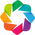

In [2]:
gv.extension('bokeh')
hv.extension('bokeh')

In [3]:
# !pip install kaggle

#### Kaggle Data Download

- The below cell can be used to download the data directly from kaggle using shell commands indicated by `!`.
- On the subsequent runs, it is advisable to comment the below cell to avoid duplication of data download

In [4]:
# !kaggle datasets download -d claygendron/us-household-income-by-zip-code-2021-2011

# !kaggle datasets download -d kartik2112/fraud-detection

# !unzip -q us-household-income-by-zip-code-2021-2011.zip

# !unzip -q fraud-detection.zip

In [5]:
fraud_train_df = pd.read_csv("./fraudTrain.csv")
fraud_test_df = pd.read_csv("./fraudTest.csv")
fraud_train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
fraud_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
fraud_train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


## Null Values in data

In [8]:
print(f"Null Values : \n{fraud_train_df.isnull().sum()}")

Null Values : 
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [9]:
print(f"Null Values : \n{fraud_test_df.isnull().sum()}")

Null Values : 
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


- There are currently no null values in the training and testing dataset
- Dropping the unnamed 0 column as it is a duplicate of the index column

### Formatting Date to `yy-mm-dd` format

In [10]:
fraud_train_df['trans_date_trans_time']=pd.to_datetime(fraud_train_df['trans_date_trans_time'])
fraud_train_df['trans_date']=fraud_train_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
fraud_train_df['trans_date']=pd.to_datetime(fraud_train_df['trans_date'])
fraud_train_df['dob']=pd.to_datetime(fraud_train_df['dob'])

fraud_test_df['trans_date_trans_time']=pd.to_datetime(fraud_test_df['trans_date_trans_time'])
fraud_test_df['trans_date']=fraud_test_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
fraud_test_df['trans_date']=pd.to_datetime(fraud_test_df['trans_date'])
fraud_test_df['dob']=pd.to_datetime(fraud_test_df['dob'])
fraud_test_df.trans_date.head(),fraud_test_df.dob.head(),fraud_train_df.trans_date.head(),fraud_train_df.dob.head()

(0   2020-06-21
 1   2020-06-21
 2   2020-06-21
 3   2020-06-21
 4   2020-06-21
 Name: trans_date, dtype: datetime64[ns],
 0   1968-03-19
 1   1990-01-17
 2   1970-10-21
 3   1987-07-25
 4   1955-07-06
 Name: dob, dtype: datetime64[ns],
 0   2019-01-01
 1   2019-01-01
 2   2019-01-01
 3   2019-01-01
 4   2019-01-01
 Name: trans_date, dtype: datetime64[ns],
 0   1988-03-09
 1   1978-06-21
 2   1962-01-19
 3   1967-01-12
 4   1986-03-28
 Name: dob, dtype: datetime64[ns])

In [11]:
fraud_train_df.drop(columns = "Unnamed: 0",inplace = True)
fraud_test_df.drop(columns = "Unnamed: 0",inplace = True)
fraud_train_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date'],
      dtype='object')

In [12]:
from datetime import datetime
def calculate_age(dob):
    today = datetime.today()
    age = today.year - dob.year
    if (today.month, today.day) < (dob.month, dob.day):
        age -= 1
    return age

In [13]:
fraud_train_df['age'] = fraud_train_df['dob'].apply(calculate_age)
fraud_test_df['age'] = fraud_test_df['dob'].apply(calculate_age)

In [14]:
fraud_train_df.sample(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,age
520972,2019-08-12 16:31:19,2248735346244816,fraud_Terry Ltd,home,3.30,Jacob,Weber,M,29156 Mark Park Apt. 108,Utica,...,269,Product/process development scientist,1962-11-11,b7acae087bd287acf7fa14dbe5688c38,1344789079,39.004730,-99.166789,0,2019-08-12,61
529466,2019-08-16 09:27:42,6011388901471808,"fraud_Reichert, Shanahan and Hayes",shopping_net,1.23,Jacqueline,Marsh,F,950 Sheryl Spurs,Dunlevy,...,427,Mining engineer,1951-02-05,326d8a89530b24abccbea2153fc120ef,1345109262,40.138589,-79.531117,0,2019-08-16,73
26568,2019-01-16 01:39:05,4312133045694601139,"fraud_Jenkins, Hauck and Friesen",gas_transport,47.47,Julian,Price,M,086 Pierce Cove,Pikesville,...,33917,Company secretary,1977-06-12,19300a05b939f1fa71be4e1cc1c7d085,1326677945,39.859123,-75.974539,0,2019-01-16,47


### Count of Fradulent transaction in training and test dataset

In [15]:
fraud_train_df["is_fraud"].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [16]:
fraud_test_df["is_fraud"].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

### Conversion of Date of birth and transaction date time to pandas date format

In [17]:
fraud_train_df["dob"] = pd.to_datetime(fraud_train_df["dob"])
fraud_train_df['trans_date_trans_time'] = pd.to_datetime(fraud_train_df['trans_date_trans_time'])

fraud_test_df["dob"] = pd.to_datetime(fraud_test_df["dob"])
fraud_test_df['trans_date_trans_time'] = pd.to_datetime(fraud_test_df['trans_date_trans_time'])

## Exploratory Data Analysis

### Fraud Distribution

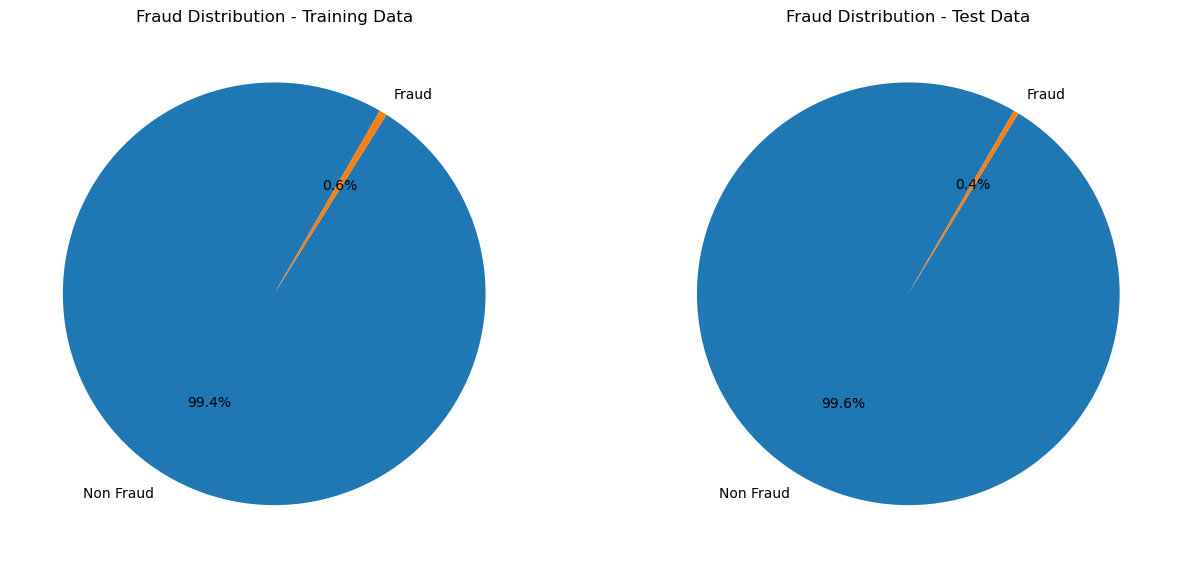

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,15))
labels = ["Non Fraud","Fraud"]
train_values = fraud_train_df.is_fraud.value_counts()
test_values = fraud_test_df.is_fraud.value_counts()

ax1.pie(train_values,labels = labels,autopct = "%1.1f%%",startangle = 60)
ax1.set_title("Fraud Distribution - Training Data")

ax2.pie(test_values,labels = labels,autopct = "%1.1f%%",startangle = 60)
ax2.set_title("Fraud Distribution - Test Data")

plt.show()

- We are able to see that the amount of fraud data is `less than 1%` in the total dataset.

### Fraud distribution across job titles

In [19]:
fraud_train_df[fraud_train_df["is_fraud"] == 1]["job"].value_counts()

job
Materials engineer                      62
Trading standards officer               56
Naval architect                         53
Exhibition designer                     51
Surveyor, land/geomatics                50
                                        ..
Statistician                             3
Health physicist                         3
Chartered loss adjuster                  3
English as a second language teacher     2
Contractor                               2
Name: count, Length: 443, dtype: int64

In [20]:
fraud_train_job = fraud_train_df[fraud_train_df["is_fraud"] == 1]["job"].value_counts().head(10)
fraud_test_job = fraud_test_df[fraud_test_df["is_fraud"] == 1]["job"].value_counts().head(10)

fraud_train_job_df = fraud_train_job.reset_index()
fraud_train_job_df.columns = ['job', 'counts']

fraud_test_job_df = fraud_test_job.reset_index()
fraud_test_job_df.columns = ['job', 'counts']

/var/folders/m6/39z99jrd3rq2vk51v5xvjkv80000gn/T/ipykernel_75943/2029555219.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_train_job_df, x="counts", y="job",palette="viridis")


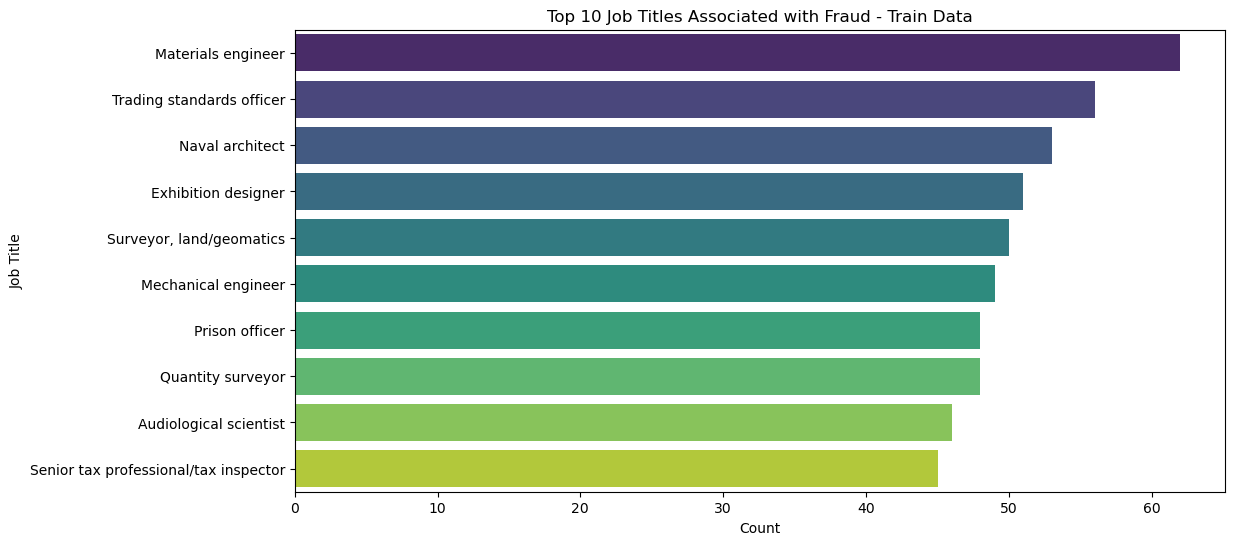

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(data=fraud_train_job_df, x="counts", y="job",palette="viridis")
plt.title('Top 10 Job Titles Associated with Fraud - Train Data')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

- In train dataset, uut of the **443 different job titles under fraud transactions**, the top ten job titles are plotted along with count of fraudulent transactions.
- `Materials engineer` is the job title associated with the highest number of fradulent transactions.

In [22]:
fraud_test_df[fraud_test_df["is_fraud"] == 1]["job"].value_counts()

job
Science writer                 30
Licensed conveyancer           29
Systems developer              29
Engineer, biomedical           28
Colour technologist            27
                               ..
Video editor                    4
Public relations officer        3
Clinical research associate     3
Commercial horticulturist       3
Pilot, airline                  2
Name: count, Length: 177, dtype: int64

/var/folders/m6/39z99jrd3rq2vk51v5xvjkv80000gn/T/ipykernel_75943/202057019.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_test_job_df, x="counts", y="job",palette="rocket")


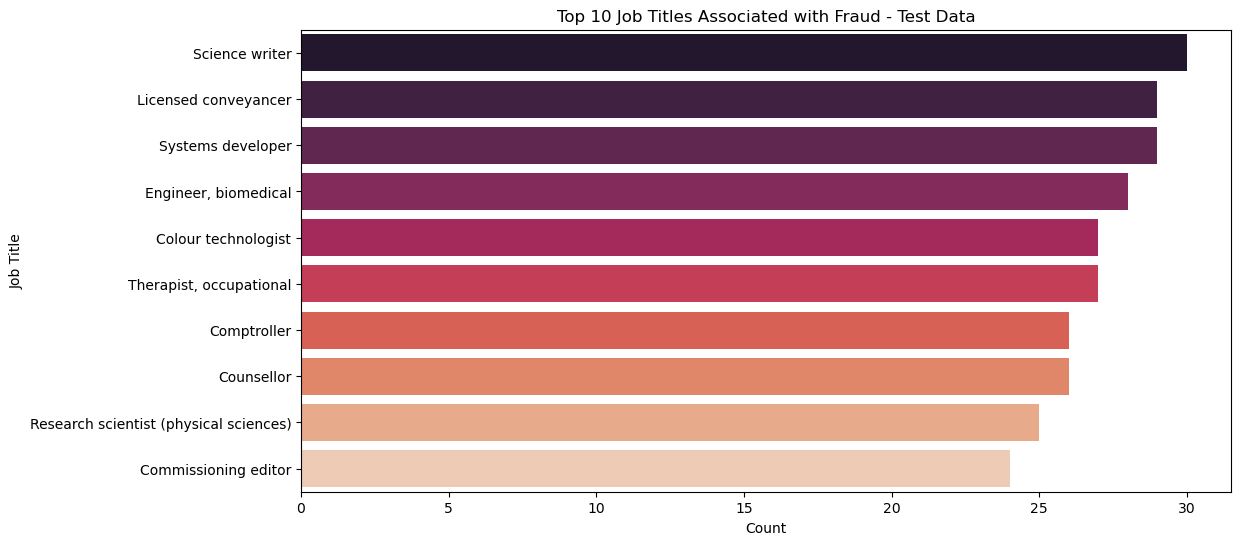

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(data=fraud_test_job_df, x="counts", y="job",palette="rocket")
plt.title('Top 10 Job Titles Associated with Fraud - Test Data')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

- In testing dataset, out of the **177 different job titles under fraud transactions**, the top ten job titles are plotted along with count of fraudulent transactions.
- `Science Writer` is the job title associated with the highest number of fradulent transactions.

### Category vs Fraud

In [24]:
fraud_train_df["category"].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

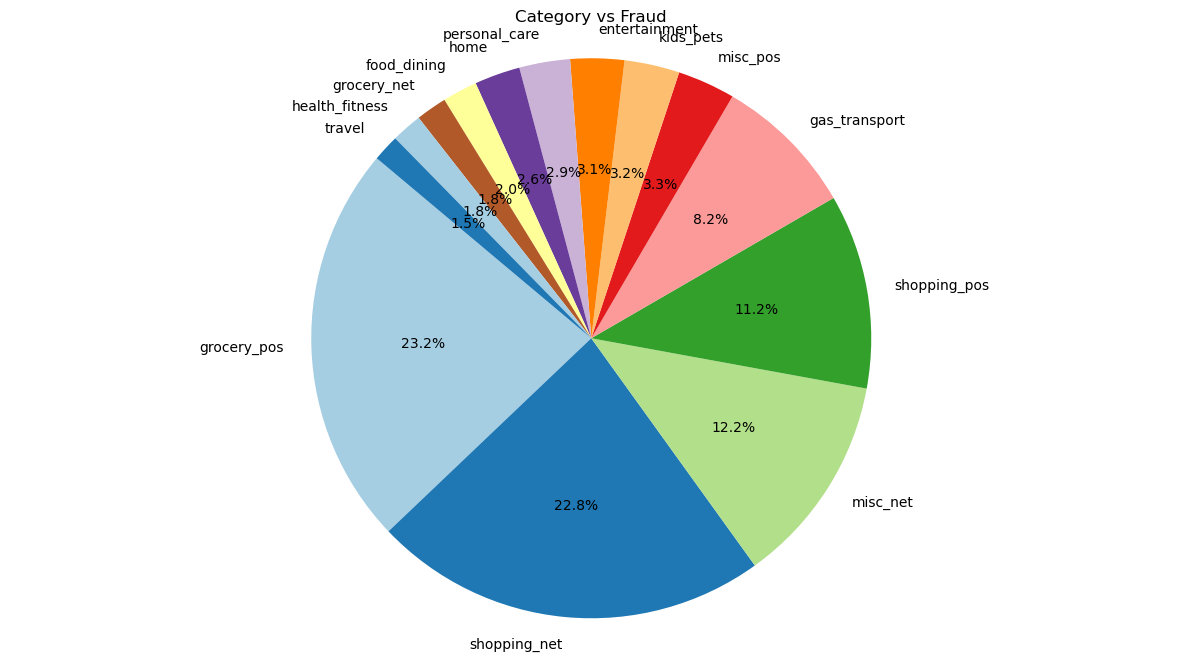

In [25]:
plt.figure(figsize=(15, 8))

fraud_category = fraud_train_df[fraud_train_df["is_fraud"] == 1]["category"].value_counts()

plt.pie(fraud_category, labels=fraud_category.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Paired", n_colors=len(fraud_category)))
plt.title("Category vs Fraud")
plt.axis('equal')
plt.show()

- Majority of Fradulent transactions fall under the `grocery_pos` and `shopping_net` category covering nearly `46 % of all fradulent transactions`.
- `Travel` is the category least picked under fraud transaction.

### Average of transaction amount

In [26]:
fraud_train_df.groupby('is_fraud')['amt'].mean()

is_fraud
0     67.667110
1    531.320092
Name: amt, dtype: float64

 - `Fraud` Transactions have a average of `531 USD`, whereas `non fraud` transactions have an average `of 68 USD` 

### Gender vs Fraud

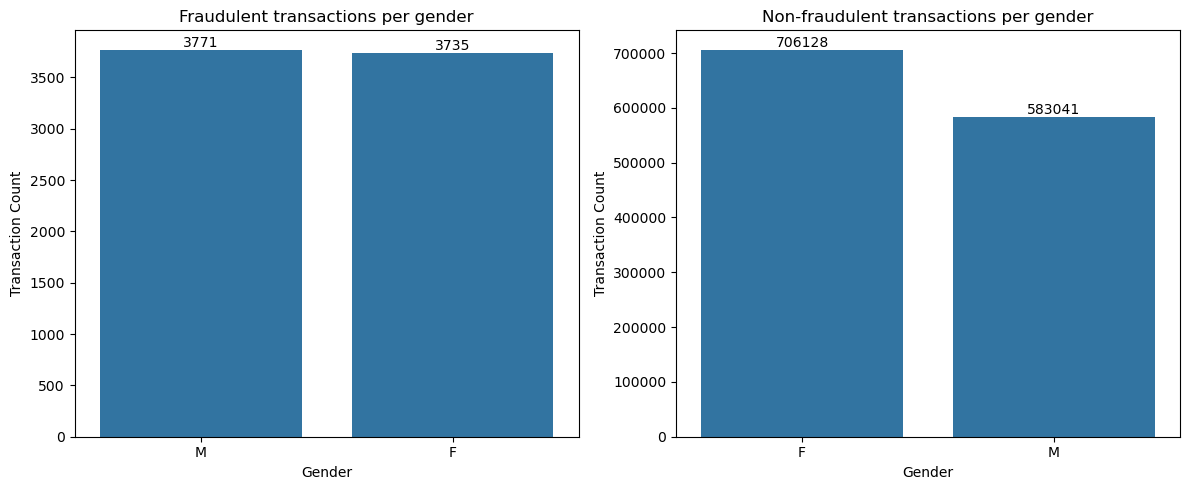

In [27]:
fraud = fraud_train_df[fraud_train_df.is_fraud == 1]
not_fraud = fraud_train_df[fraud_train_df.is_fraud == 0]


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 5))

g_fraud = fraud.gender.value_counts().reset_index()
g_fraud.columns = ["Gender", "Counts"]
g_not_fraud = not_fraud.gender.value_counts().reset_index()
g_not_fraud.columns = ["Gender", "Counts"]

sns.barplot(x="Gender", y="Counts", data=g_fraud, ax=ax1)
ax1.set_title("Fraudulent transactions per gender")
ax1.set_xlabel("Gender")
ax1.set_ylabel("Transaction Count")
ax1.bar_label(ax1.containers[0])

sns.barplot(x="Gender", y="Counts", data=g_not_fraud, ax=ax2)
ax2.set_title("Non-fraudulent transactions per gender")
ax2.set_xlabel("Gender")
ax2.set_ylabel("Transaction Count")
ax2.bar_label(ax2.containers[0])

plt.tight_layout()

- Out of **7506 fraud** transactions, `50.2% are Male and 49.8% are female`.
- Out of **1289169 non fraud** transactions,  `54.8% are Male, 45.2% are female`.
- We notice that there is no significant differences between the number of fraud victims with respect to gender. Women are involved in more transactions than men - 709863 transactions for the former compared to 586812 for the latter. Hence, around 0.64% of transactions involving men are fraudulent compared to 0.53% for women.

### Age Group vs Fraud

In [28]:
bins = [10, 18, 35, 60, 100]
labels = ["<18", "18-35", "35-60", "60+"]
fraud_train_df["age_group"] = pd.cut(fraud_train_df['age'], bins=bins, labels=labels, right=True)
fraud_test_df["age_group"] = pd.cut(fraud_test_df['age'], bins=bins, labels=labels, right=True)
fraud_train_df.sample(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,age,age_group
901856,2019-12-27 12:17:45,370877495212014,fraud_Fritsch LLC,travel,8.93,Sarah,Clark,F,25961 Beverly Union Apt. 042,North Wilkesboro,...,Dispensing optician,1984-03-06,b6f2277556e16417b73c7075c8a5403b,1356610665,35.682568,-81.938747,0,2019-12-27,40,35-60
1155162,2020-04-27 00:56:20,501831082224,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,141.99,Corey,Jones,M,709 George Underpass Apt. 080,West Decatur,...,Armed forces logistics/support/administrative ...,1962-05-04,8e71676e84eb3d090f38f9acaafdc2f7,1367024180,41.460121,-77.581480,0,2020-04-27,62,60+


In [29]:
age_fraud = fraud_train_df[fraud_train_df.is_fraud == 1].age_group.value_counts().reset_index()
age_fraud.columns = ["Age group", "Counts"]
age_not_fraud = fraud_train_df[fraud_train_df.is_fraud == 0].age_group.value_counts().reset_index()
age_not_fraud.columns = ["Age group", "Counts"]

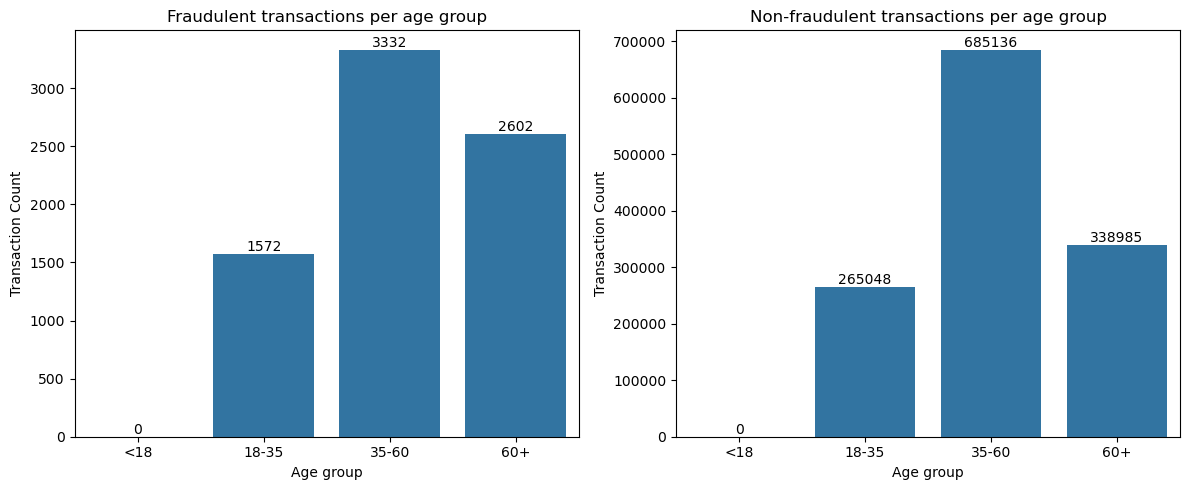

In [30]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x="Age group", y="Counts", data=age_fraud, ax=ax1)
ax1.set_title("Fraudulent transactions per age group")
ax1.set_xlabel("Age group")
ax1.set_ylabel("Transaction Count")
ax1.bar_label(ax1.containers[0])

sns.barplot(x="Age group", y="Counts", data=age_not_fraud, ax=ax2)
ax2.set_title("Non-fraudulent transactions per age group")
ax2.set_xlabel("Age group")
ax2.set_ylabel("Transaction Count")
ax2.bar_label(ax2.containers[0])

plt.tight_layout()

- We notice that teenagers are less likely to fall to credit card scams due to less access to credit cards.
- People in middle age groups (`35-60`) are more likely to fall to scams which might be due to more credit card usage.
- However higher percentage of credit scams is observed under `60+` age group, due to less exposure to credit card.

In [31]:
fraud_train_df[['city', 'state', 'zip', 'lat', 'long', 'city_pop','trans_date']]

,city,state,zip,lat,long,city_pop,trans_date
0,Moravian Falls,NC,28654,36.0788,-81.1781,3495,2019-01-01
1,Orient,WA,99160,48.8878,-118.2105,149,2019-01-01
2,Malad City,ID,83252,42.1808,-112.2620,4154,2019-01-01
3,Boulder,MT,59632,46.2306,-112.1138,1939,2019-01-01
4,Doe Hill,VA,24433,38.4207,-79.4629,99,2019-01-01
...,...,...,...,...,...,...,...
1296670,Hatch,UT,84735,37.7175,-112.4777,258,2020-06-21
1296671,Tuscarora,MD,21790,39.2667,-77.5101,100,2020-06-21
1296672,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,2020-06-21
1296673,Manderson,SD,57756,43.3526,-102.5411,1126,2020-06-21


In [32]:
len(fraud_train_df['zip'].unique())

970

In [33]:
fraud_train_df['zip'].dtype

dtype('int64')

### Data on USA median income from 2011 till 2021

In [34]:
us_median_income = pd.read_csv("./us_income_zipcode.csv")

In [35]:
us_median_income.head()

,ZIP,Geography,Geographic Area Name,Households,Households Margin of Error,"Households Less Than $10,000","Households Less Than $10,000 Margin of Error","Households $10,000 to $14,999","Households $10,000 to $14,999 Margin of Error","Households $15,000 to $24,999",...,"Nonfamily Households $150,000 to $199,999","Nonfamily Households $150,000 to $199,999 Margin of Error","Nonfamily Households $200,000 or More","Nonfamily Households $200,000 or More Margin of Error",Nonfamily Households Median Income (Dollars),Nonfamily Households Median Income (Dollars) Margin of Error,Nonfamily Households Mean Income (Dollars),Nonfamily Households Mean Income (Dollars) Margin of Error,Nonfamily Households Nonfamily Income in the Past 12 Months,Year
0,601,860Z200US00601,ZCTA5 00601,5397.0,264.0,33.2,4.4,15.7,2.9,23.9,...,0.0,2.8,0.0,2.8,9386.0,1472.0,13044.0,1949.0,15.0,2021.0
1,602,860Z200US00602,ZCTA5 00602,12858.0,448.0,27.1,2.9,12.7,2.1,20.5,...,0.0,1.3,0.0,1.3,11242.0,1993.0,16419.0,2310.0,20.1,2021.0
2,603,860Z200US00603,ZCTA5 00603,19295.0,555.0,32.1,2.5,13.4,1.6,17.2,...,0.6,0.6,0.2,0.4,10639.0,844.0,16824.0,2217.0,34.9,2021.0
3,606,860Z200US00606,ZCTA5 00606,1968.0,171.0,28.4,5.5,13.3,4.4,23.3,...,0.0,7.5,0.0,7.5,15849.0,3067.0,16312.0,2662.0,13.0,2021.0
4,610,860Z200US00610,ZCTA5 00610,8934.0,372.0,20.5,2.5,13.2,2.5,23.3,...,0.0,1.8,0.0,1.8,12832.0,2405.0,16756.0,1740.0,14.5,2021.0


In [36]:
len(us_median_income['ZIP'].unique())

33995

In [37]:
us_median_income['ZIP'].dtype

dtype('int64')

In [38]:
us_median_income['Year'].dtype

dtype('float64')

In [39]:
us_median_income['Year'] = us_median_income['Year'].astype(int)

In [40]:
us_median_income['Year'].dtype

dtype('int64')

In [41]:
us_median_income.columns

Index(['ZIP', 'Geography', 'Geographic Area Name', 'Households',
       'Households Margin of Error', 'Households Less Than $10,000',
       'Households Less Than $10,000 Margin of Error',
       'Households $10,000 to $14,999',
       'Households $10,000 to $14,999 Margin of Error',
       'Households $15,000 to $24,999',
       ...
       'Nonfamily Households $150,000 to $199,999',
       'Nonfamily Households $150,000 to $199,999 Margin of Error',
       'Nonfamily Households $200,000 or More',
       'Nonfamily Households $200,000 or More Margin of Error',
       'Nonfamily Households Median Income (Dollars)',
       'Nonfamily Households Median Income (Dollars) Margin of Error',
       'Nonfamily Households Mean Income (Dollars)',
       'Nonfamily Households Mean Income (Dollars) Margin of Error',
       'Nonfamily Households Nonfamily Income in the Past 12 Months', 'Year'],
      dtype='object', length=111)

In [42]:
us_median_income.describe().T

,count,mean,std,min,25%,50%,75%,max
ZIP,364998.0,49669.451715,27564.669782,601.0,26651.0,49736.0,72127.0,99929.0
Households,364939.0,3604.747867,5194.617369,0.0,270.0,1058.0,4967.0,43607.0
Households Margin of Error,364939.0,179.438725,159.122638,2.0,60.0,126.0,262.0,1943.0
"Households Less Than $10,000",358073.0,6.968408,7.347806,0.0,2.8,5.3,9.0,100.0
"Households Less Than $10,000 Margin of Error",358073.0,7.722688,13.248061,0.1,1.9,3.2,6.6,100.0
...,...,...,...,...,...,...,...,...
Nonfamily Households Median Income (Dollars) Margin of Error,318185.0,11105.358244,13742.423952,98.0,4283.0,7310.0,13081.0,568658.0
Nonfamily Households Mean Income (Dollars),332955.0,44226.717523,22120.853590,1149.0,30835.0,39665.0,52118.0,868954.0
Nonfamily Households Mean Income (Dollars) Margin of Error,332955.0,11843.551071,15478.875992,59.0,5430.0,8162.0,13116.0,1251160.0
Nonfamily Households Nonfamily Income in the Past 12 Months,351352.0,30.053071,16.086709,0.0,21.4,28.7,36.8,100.0


In [43]:
us_median_income_2021_2011 = us_median_income[['ZIP','Year','Households Median Income (Dollars)']]
us_median_income_2021_2011

,ZIP,Year,Households Median Income (Dollars)
0,601,2021,15292.0
1,602,2021,18716.0
2,603,2021,16789.0
3,606,2021,18835.0
4,610,2021,21239.0
...,...,...,...
364993,99923,2011,27500.0
364994,99925,2011,43125.0
364995,99926,2011,45216.0
364996,99927,2011,17639.0


In [44]:
us_median_income_2020_2019 = us_median_income_2021_2011[us_median_income_2021_2011['Year'].isin([2019,2020])]
us_median_income_2020_2019['Year'].unique()

array([2020, 2019])

In [45]:
us_median_income_2020_2019

,ZIP,Year,Households Median Income (Dollars)
33774,601,2020,14398.0
33775,602,2020,16771.0
33776,603,2020,15786.0
33777,606,2020,14980.0
33778,610,2020,20167.0
...,...,...,...
100009,99923,2019,NaN
100010,99925,2019,62917.0
100011,99926,2019,56188.0
100012,99927,2019,NaN


#### Adding Transaction Year to the train and test data

In [46]:
fraud_train_df["trans_year"] = pd.Series(pd.to_datetime(fraud_train_df.trans_date_trans_time)).dt.year
fraud_test_df["trans_year"] = pd.Series(pd.to_datetime(fraud_test_df.trans_date_trans_time)).dt.year
fraud_train_df["trans_year"]

0          2019
1          2019
2          2019
3          2019
4          2019
           ... 
1296670    2020
1296671    2020
1296672    2020
1296673    2020
1296674    2020
Name: trans_year, Length: 1296675, dtype: int32

In [47]:
fraud_train_df = pd.merge(fraud_train_df, us_median_income_2020_2019, how="left", left_on=["trans_year", "zip"], right_on=["Year", "ZIP"])
fraud_train_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_lat,merch_long,is_fraud,trans_date,age,age_group,trans_year,ZIP,Year,Households Median Income (Dollars)
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.011293,-82.048315,0,2019-01-01,36,35-60,2019,28654,2019,45809.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,49.159047,-118.186462,0,2019-01-01,46,35-60,2019,99160,2019,22500.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,43.150704,-112.154481,0,2019-01-01,62,60+,2019,83252,2019,53636.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,47.034331,-112.561071,0,2019-01-01,57,35-60,2019,59632,2019,44063.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.674999,-78.632459,0,2019-01-01,38,35-60,2019,24433,2019,47813.0


In [48]:
fraud_train_df = fraud_train_df.drop(columns=[col for col in fraud_train_df.columns if col.endswith(('_x', '_y'))])
fraud_train_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'age', 'age_group',
       'trans_year', 'ZIP', 'Year', 'Households Median Income (Dollars)'],
      dtype='object')

In [49]:
fraud_test_df = pd.merge(fraud_test_df, us_median_income_2020_2019, how="left", left_on=["trans_year", "zip"], right_on=["Year", "ZIP"])
fraud_test_df = fraud_test_df.drop(columns=[col for col in fraud_test_df.columns if col.endswith(('_x', '_y'))])
fraud_test_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'age', 'age_group',
       'trans_year', 'ZIP', 'Year', 'Households Median Income (Dollars)'],
      dtype='object')

### Household Median Income based on ZipCode  vs Fraud transactions

In [50]:
fraud_train_df['Households Median Income (Dollars)'].max(), fraud_train_df['Households Median Income (Dollars)'].min()

(214414.0, 10514.0)

In [51]:
fraud_test_df['Households Median Income (Dollars)'].max(), fraud_test_df['Households Median Income (Dollars)'].min()

(214414.0, 10514.0)

In [52]:

amount_bins = [0, 10000, 50000, 100000, 214414]
amount_labels = ["<10k", "10k-50k", "50k-100k", "100k+"]


fraud_train_df["Median_Income_group"] = pd.cut(fraud_train_df['Households Median Income (Dollars)'], bins=amount_bins, labels=amount_labels, right=False)
fraud_test_df["Median_Income_group"] = pd.cut(fraud_test_df['Households Median Income (Dollars)'], bins=amount_bins, labels=amount_labels, right=False)


fraud_train_df.sample(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_long,is_fraud,trans_date,age,age_group,trans_year,ZIP,Year,Households Median Income (Dollars),Median_Income_group
819890,2019-12-08 18:41:37,4223708906367574214,"fraud_Pouros, Walker and Spencer",kids_pets,45.67,Adam,Riddle,M,27718 Mason Bypass,Mount Saint Joseph,...,-84.137404,0,2019-12-08,50,35-60,2019,45051,2019,NaN,NaN
818250,2019-12-08 13:40:53,5104807169438134,fraud_Bins-Howell,personal_care,65.01,Regina,Johnston,F,641 Steven Mall Apt. 299,Westhampton Beach,...,-72.941662,0,2019-12-08,46,35-60,2019,11978,2019,103990.0,100k+


In [53]:
income_fraud = fraud_train_df[fraud_train_df.is_fraud == 1].Median_Income_group.value_counts().reset_index()
income_fraud.columns = ["Median Income group", "Counts"]
income_not_fraud = fraud_train_df[fraud_train_df.is_fraud == 0].Median_Income_group.value_counts().reset_index()
income_not_fraud.columns = ["Median Income group", "Counts"]

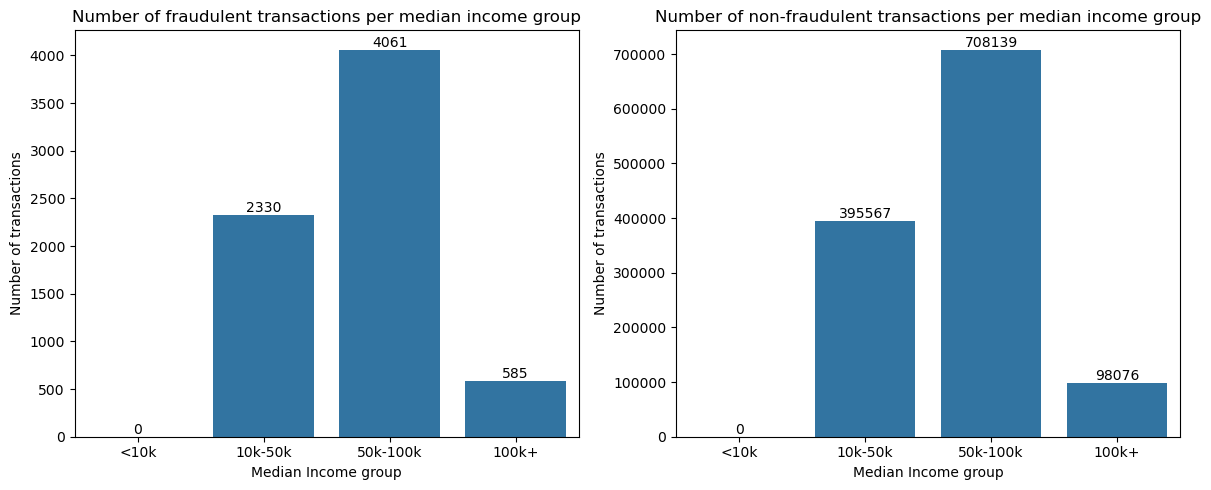

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x="Median Income group", y="Counts", data=income_fraud, ax=ax1)
ax1.set_title("Number of fraudulent transactions per median income group")
ax1.set_xlabel("Median Income group")
ax1.set_ylabel("Number of transactions")
ax1.bar_label(ax1.containers[0])

sns.barplot(x="Median Income group", y="Counts", data=income_not_fraud, ax=ax2)
ax2.set_title("Number of non-fraudulent transactions per median income group")
ax2.set_xlabel("Median Income group")
ax2.set_ylabel("Number of transactions")
ax2.bar_label(ax2.containers[0])

plt.tight_layout()

- Based on above bar graph, we are able to see that the `majority` of the fraud transaction is targeted around the `50,000 to 100,000 USD Median Household Income groups`.
-  We are also able to see that the number of credit card transactions is most used in the `50,000 to 100,000 USD Median Household Income group` as well.
-  Comparing the percentage of fraud transaction,`100k+ group` has the higher percentage when compared to rest of teh groups.

In [55]:
fraud_train_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_date', 'age', 'age_group',
       'trans_year', 'ZIP', 'Year', 'Households Median Income (Dollars)',
       'Median_Income_group'],
      dtype='object')

### Region, Income Group vs Number of Transactions

In [56]:
state_to_region = {
    'ME': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast',
    'MA': 'Northeast', 'RI': 'Northeast', 'CT': 'Northeast',
    'NY': 'Northeast', 'NJ': 'Northeast', 'PA': 'Northeast',
    'OH': 'Midwest', 'IN': 'Midwest', 'IL': 'Midwest', 'MI': 'Midwest',
    'WI': 'Midwest', 'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest',
    'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest',
    'DE': 'South', 'MD': 'South', 'DC': 'South', 'VA': 'South',
    'WV': 'South', 'NC': 'South', 'SC': 'South',
    'GA': 'South', 'FL': 'South', 'AL': 'South', 'MS': 'South',
    'TN': 'South', 'KY': 'South', 'AR': 'South', 'LA': 'South',
    'OK': 'South', 'TX': 'South', 'MT': 'Rocky Mountains', 'WY': 'Rocky Mountains',
    'CO': 'Rocky Mountains', 'NM': 'Rocky Mountains', 'ID': 'Rocky Mountains',
    'UT': 'Rocky Mountains', 'AZ': 'Rocky Mountains' , 'NV': 'Rocky Mountains', 'WA': 'Far West', 'OR': 'Far West',
    'CA': 'Far West', 'HI': 'Far West', 'AK': 'Far West'
}

fraud_train_df["Region"] = fraud_train_df.state.map(state_to_region)
fraud_test_df["Region"] = fraud_test_df.state.map(state_to_region)

Region based split from `https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States#/media/File:Census_Regions_and_Division_of_the_United_States.svg`
Wikipedia

In [57]:
region_income_fraud = fraud_train_df[fraud_train_df.is_fraud == 1][['Region','Median_Income_group']].value_counts().reset_index()
region_income_fraud.columns = ["Region","Median_Income_group","Counts"]
region_income_not_fraud = fraud_train_df[fraud_train_df.is_fraud == 0][['Region','Median_Income_group']].value_counts().reset_index()
region_income_not_fraud.columns = ["Region","Median_Income_group", "Counts"]

In [58]:
from bokeh.io import output_notebook, show
from bokeh.models import ColorBar, HoverTool
from bokeh.plotting import figure
from bokeh.transform import linear_cmap
from bokeh.layouts import column
from bokeh.palettes import Viridis256

output_notebook()

df_pivot = region_income_fraud.pivot_table(index="Region", columns="Median_Income_group", values="Counts")


data = df_pivot.reset_index()
data = pd.melt(data, id_vars='Region', var_name='Median_Income_group', value_name='Counts')


p = figure(title="Heatmap of Fraud Transactions by Region and Income",
           x_range=list(data['Median_Income_group'].unique()),
           y_range=list(data['Region'].unique()),
           x_axis_location="above",
           tools="hover",
           tooltips=[("Region", "@Region"), ("Income Group", "@Median_Income_group"), ("Counts", "@Counts")],
           height=600, width=900)


mapper = linear_cmap(field_name='Counts', palette=Viridis256, low=data['Counts'].min(), high=data['Counts'].max())


p.rect(x='Median_Income_group', y='Region', width=1, height=1,
        source=data,
        line_color=None,
        fill_color=mapper)


color_bar = ColorBar(color_mapper=mapper['transform'], location=(0, 0))
p.add_layout(color_bar, 'right')


p.xaxis.axis_label = "Income"
p.yaxis.axis_label = "Region"
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.title.align = "center"


show(p)

Loading BokehJS ...

/var/folders/m6/39z99jrd3rq2vk51v5xvjkv80000gn/T/ipykernel_75943/2731013701.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = region_income_fraud.pivot_table(index="Region", columns="Median_Income_group", values="Counts")


- Based on Above heat map, the `Southern Region of USA` with the Household Median income group of `50k - 100k` has the highest amount of `fraudulent` transactions.
- `Rocky Mountains region with 10k-50k` and `Midwest region with 100+ Median income group` have the `least` amount of fradulent transaction.
- The lower amount of transaction in `Midwest under 100+ Median income group`, could be due to the `amount per transaction is very large`.

In [59]:
from bokeh.io import output_notebook, show
from bokeh.models import ColorBar, HoverTool
from bokeh.plotting import figure
from bokeh.transform import linear_cmap
from bokeh.layouts import column
from bokeh.palettes import Viridis256

output_notebook()

df_pivot = region_income_not_fraud.pivot_table(index="Region", columns="Median_Income_group", values="Counts")

data = df_pivot.reset_index()
data = pd.melt(data, id_vars='Region', var_name='Median_Income_group', value_name='Counts')


p = figure(title="Heatmap of Non Fraud Transactions by Region and Income",
           x_range=list(data['Median_Income_group'].unique()),
           y_range=list(data['Region'].unique()),
           x_axis_location="above",
           tools="hover",
           tooltips=[("Region", "@Region"), ("Income Group", "@Median_Income_group"), ("Counts", "@Counts")],
           height=600, width=900)


mapper = linear_cmap(field_name='Counts', palette=Viridis256, low=data['Counts'].min(), high=data['Counts'].max())


p.rect(x='Median_Income_group', y='Region', width=1, height=1,
        source=data,
        line_color=None,
        fill_color=mapper)


color_bar = ColorBar(color_mapper=mapper['transform'], location=(0, 0))
p.add_layout(color_bar, 'right')


p.xaxis.axis_label = "Income"
p.yaxis.axis_label = "Region"
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.title.align = "center"


show(p)

Loading BokehJS ...

/var/folders/m6/39z99jrd3rq2vk51v5xvjkv80000gn/T/ipykernel_75943/2246045197.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = region_income_not_fraud.pivot_table(index="Region", columns="Median_Income_group", values="Counts")


In [60]:
fraud_train_df['state'].unique()

array(['NC', 'WA', 'ID', 'MT', 'VA', 'PA', 'KS', 'TN', 'IA', 'WV', 'FL',
       'CA', 'NM', 'NJ', 'OK', 'IN', 'MA', 'TX', 'WI', 'MI', 'WY', 'HI',
       'NE', 'OR', 'LA', 'DC', 'KY', 'NY', 'MS', 'UT', 'AL', 'AR', 'MD',
       'GA', 'ME', 'AZ', 'MN', 'OH', 'CO', 'VT', 'MO', 'SC', 'NV', 'IL',
       'NH', 'SD', 'AK', 'ND', 'CT', 'RI', 'DE'], dtype=object)

In [61]:
fraud_test_df['state'].unique()

array(['SC', 'UT', 'NY', 'FL', 'MI', 'CA', 'SD', 'PA', 'TX', 'KY', 'WY',
       'AL', 'LA', 'GA', 'CO', 'OH', 'WI', 'VT', 'AR', 'NJ', 'IA', 'MD',
       'MS', 'KS', 'IL', 'MO', 'ME', 'TN', 'DC', 'AZ', 'MT', 'MN', 'OK',
       'WA', 'WV', 'NM', 'MA', 'NE', 'VA', 'ID', 'OR', 'IN', 'NC', 'NH',
       'ND', 'CT', 'NV', 'HI', 'RI', 'AK'], dtype=object)

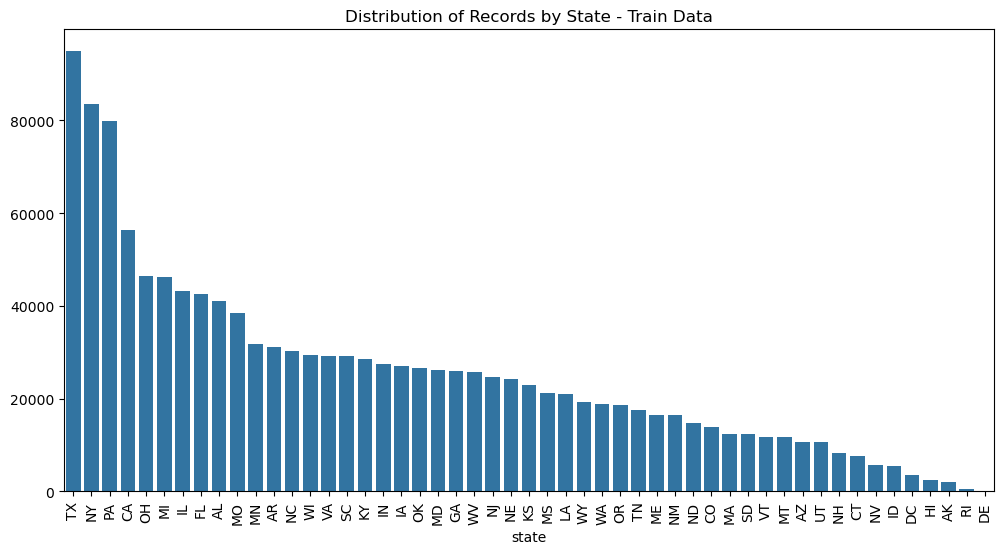

In [62]:
state_counts = fraud_train_df['state'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.title('Distribution of Records by State - Train Data')
plt.xticks(rotation=90)
plt.show()

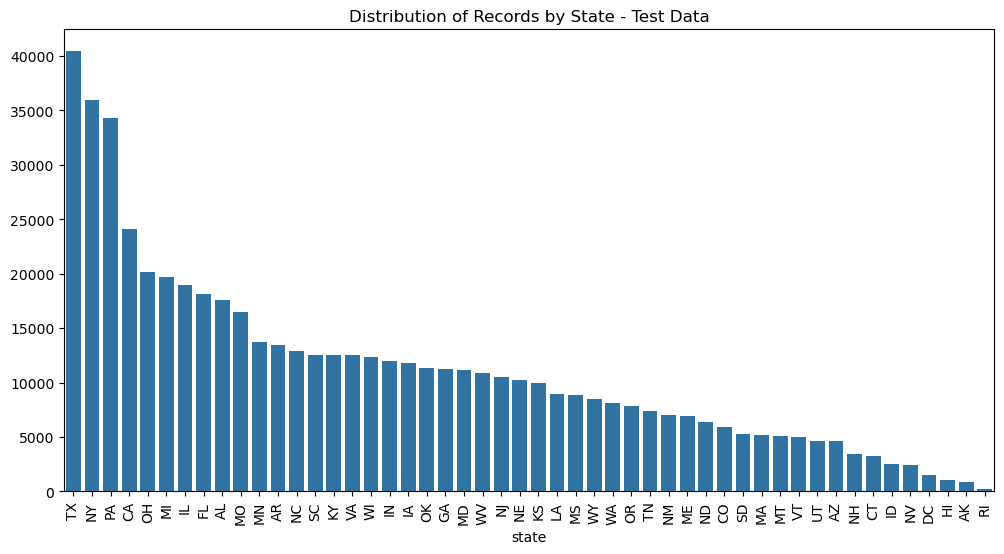

In [63]:
state_counts_1 = fraud_test_df['state'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts_1.index, y=state_counts_1.values)
plt.title('Distribution of Records by State - Test Data')
plt.xticks(rotation=90)
plt.show()

### GEOPLOT of the sample 100 transactions

In [64]:
# !pip install geoviews

In [65]:
# import holoviews as hv
# import hvplot.pandas
# import panel as pn
# import geoviews as gv 
# import geopandas as gpd
# from bokeh.models import HoverTool, Legend

#### GeoCity is the feature name required for Geopandas to plot the values using geoviews map

In [66]:
fraud_train_df['GeoCity'] = fraud_train_df.city

In [67]:

geo_fraud_train_df = gpd.GeoDataFrame(
    fraud_train_df, geometry=gpd.points_from_xy(fraud_train_df.long, fraud_train_df.lat)
)


In [68]:
geo_fraud_train_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,age,age_group,trans_year,ZIP,Year,Households Median Income (Dollars),Median_Income_group,Region,GeoCity,geometry
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36,35-60,2019,28654,2019,45809.0,10k-50k,South,Moravian Falls,POINT (-81.1781 36.0788)
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,46,35-60,2019,99160,2019,22500.0,10k-50k,Far West,Orient,POINT (-118.2105 48.8878)
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,62,60+,2019,83252,2019,53636.0,50k-100k,Rocky Mountains,Malad City,POINT (-112.262 42.1808)
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,57,35-60,2019,59632,2019,44063.0,10k-50k,Rocky Mountains,Boulder,POINT (-112.1138 46.2306)
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38,35-60,2019,24433,2019,47813.0,10k-50k,South,Doe Hill,POINT (-79.4629 38.4207)


In [69]:
world = gv.tile_sources.OSM().opts(
    height=1000,
    width=1200
)

In [70]:
geo_fraud_train_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 33 columns):
 #   Column                              Non-Null Count    Dtype         
---  ------                              --------------    -----         
 0   trans_date_trans_time               1296675 non-null  datetime64[ns]
 1   cc_num                              1296675 non-null  int64         
 2   merchant                            1296675 non-null  object        
 3   category                            1296675 non-null  object        
 4   amt                                 1296675 non-null  float64       
 5   first                               1296675 non-null  object        
 6   last                                1296675 non-null  object        
 7   gender                              1296675 non-null  object        
 8   street                              1296675 non-null  object        
 9   city                                1296675 non-null  object

In [71]:

# hover = HoverTool(
#     tooltips=[
#             ("is_fraud", "@is_fraud"),
#             ("Median_Income_group", "@Median_Income_group"),
#             ("Age Group", "@age_group"),
#             ("city", "@city"),
#             ("state", "@state")
#         ]
#     )

# legend = Legend(location = (0, -30))

# busy_geo = world * gv.Points(geo_fraud_train_df.iloc[:100]).opts(
#     tools = [hover],
#     show_legend= True,
#     size = gv.dim('Households Median Income (Dollars)')/5000,
#     color = 'zip',
#     cmap='viridis',
#     height = 7000,
#     width = 10000,
#     title = 'Transactions across Household Median Income '
# )

# pn.Row(
#     busy_geo
# )

In [72]:
city_grouped = fraud_train_df.groupby(['city', 'long', 'lat']).agg(
    fraud_count=pd.NamedAgg(column='is_fraud', aggfunc='sum'),
    non_fraud_count=pd.NamedAgg(column='is_fraud', aggfunc=lambda x: (x == 0).sum()), 
    Median_Income_group=pd.NamedAgg(column='Median_Income_group', aggfunc='first'),
    age_group=pd.NamedAgg(column='age_group', aggfunc='first'),
    state=pd.NamedAgg(column='state', aggfunc='first')
).reset_index()

world = gv.tile_sources.OSM().opts(
    height=1000,
    width=1200
)

hover = HoverTool(
    tooltips=[
        ("City", "@city"),
        ("State", "@state"),
        ("Fraud Count", "@fraud_count"),
        ("Non-Fraud Count", "@non_fraud_count"),
        ("Median Income Group", "@Median_Income_group"),
        ("Age Group", "@age_group")
    ]
)

busy_geo = world * gv.Points(
    city_grouped, 
    ['long', 'lat'],
    ['city', 'state', 'fraud_count', 'non_fraud_count', 'Median_Income_group', 'age_group']
).opts(
    tools=[hover],
    show_legend=True,
    size=gv.dim('fraud_count'),  
    color='fraud_count',  
    cmap='viridis',
    height=1000,
    width=1200,
    title='Fraudulent and Non-Fraudulent Transactions by City'
)

pn.Row(
    busy_geo, 
).servable()


Row
    [0] HoloViews(Overlay, height=1000, sizing_mode='fixed', width=1200)

- The plot for transactions by city is more concentrated around the `East`.
- This may be due to the fact that `most of the population in USA is in Eastern side`.
- The `scarcity` of transactions towards the Western side could be due to the Rocky mountains.

## Handling null values

In [73]:
print(fraud_train_df.isna().sum())

trans_date_trans_time                     0
cc_num                                    0
merchant                                  0
category                                  0
amt                                       0
first                                     0
last                                      0
gender                                    0
street                                    0
city                                      0
state                                     0
zip                                       0
lat                                       0
long                                      0
city_pop                                  0
job                                       0
dob                                       0
trans_num                                 0
unix_time                                 0
merch_lat                                 0
merch_long                                0
is_fraud                                  0
trans_date                      

In [74]:
fraud_train_df['Region'].value_counts()

Region
South              494791
Midwest            364210
Northeast          245130
Far West            98560
Rocky Mountains     93984
Name: count, dtype: int64

In [75]:
fraud_train_df[fraud_train_df['Region'].isna()]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_date,age,age_group,trans_year,ZIP,Year,Households Median Income (Dollars),Median_Income_group,Region,GeoCity


In [76]:
fraud_train_df[~fraud_train_df['state'].isin(state_to_region.keys())]['state'].unique()

array([], dtype=object)

- NAN in Regsion has been sorted out

In [77]:
print(fraud_train_df.isna().sum())

trans_date_trans_time                     0
cc_num                                    0
merchant                                  0
category                                  0
amt                                       0
first                                     0
last                                      0
gender                                    0
street                                    0
city                                      0
state                                     0
zip                                       0
lat                                       0
long                                      0
city_pop                                  0
job                                       0
dob                                       0
trans_num                                 0
unix_time                                 0
merch_lat                                 0
merch_long                                0
is_fraud                                  0
trans_date                      

In [78]:
fraud_train_df['Households Median Income (Dollars)'].value_counts()

Households Median Income (Dollars)
58750.0    4875
50000.0    3878
41250.0    3655
66250.0    3552
50625.0    3447
           ... 
51552.0       7
94863.0       7
98463.0       7
24455.0       7
41232.0       7
Name: count, Length: 1622, dtype: int64

In [79]:
fraud_train_df[fraud_train_df['Households Median Income (Dollars)'].isna()]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_date,age,age_group,trans_year,ZIP,Year,Households Median Income (Dollars),Median_Income_group,Region,GeoCity
8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,...,2019-01-01,83,60+,2019,15665,2019,NaN,NaN,Northeast,Manor
35,2019-01-01 00:25:46,349612764943496,fraud_Hudson-Ratke,grocery_pos,99.00,Xavier,Beltran,M,61107 Edwards Dam Apt. 463,Big Creek,...,2019-01-01,40,35-60,2019,40914,2019,NaN,NaN,South,Big Creek
42,2019-01-01 00:31:51,4642255475285942,fraud_Ledner-Pfannerstill,gas_transport,102.13,Sabrina,Johnson,F,320 Nicholson Orchard,Thompson,...,2019-01-01,37,35-60,2019,84540,2019,NaN,NaN,Rocky Mountains,Thompson
47,2019-01-01 00:34:10,3553629419254918,fraud_Stracke-Lemke,grocery_pos,83.07,Sharon,Johnson,F,7202 Jeffrey Mills,Conway,...,2019-01-01,40,35-60,2019,98238,2019,NaN,NaN,Far West,Conway
59,2019-01-01 00:41:45,4642255475285942,fraud_Huel-Langworth,misc_net,177.57,Sabrina,Johnson,F,320 Nicholson Orchard,Thompson,...,2019-01-01,37,35-60,2019,84540,2019,NaN,NaN,Rocky Mountains,Thompson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296599,2020-06-21 11:35:54,3540210836308425,fraud_DuBuque LLC,grocery_pos,108.04,Steven,Yoder,M,94975 David Mews Apt. 316,Summerfield,...,2020-06-21,32,18-35,2020,79085,2020,NaN,NaN,South,Summerfield
1296612,2020-06-21 11:40:31,349612764943496,"fraud_Labadie, Treutel and Bode",shopping_net,88.76,Xavier,Beltran,M,61107 Edwards Dam Apt. 463,Big Creek,...,2020-06-21,40,35-60,2020,40914,2020,NaN,NaN,South,Big Creek
1296631,2020-06-21 11:53:11,4430881574719618,"fraud_Christiansen, Goyette and Schamberger",gas_transport,47.93,Alicia,Morales,F,4456 Dunn Roads,Meredith,...,2020-06-21,84,60+,2020,81642,2020,NaN,NaN,Rocky Mountains,Meredith
1296657,2020-06-21 12:07:20,4464457352619,"fraud_Greenfelder, Bartoletti and Davis",misc_net,264.22,Breanna,Rodriguez,F,118 Cabrera Springs Apt. 105,Lanark Village,...,2020-06-21,34,18-35,2020,32323,2020,NaN,NaN,South,Lanark Village


In [80]:
list_of_income_na = fraud_train_df[fraud_train_df['Households Median Income (Dollars)'].isna()][['Year','zip']]
list_of_income_na['zip'].unique()

array([15665, 40914, 84540, 98238, 15484, 72165, 93529, 68881, 95537,
       31561, 83643, 82936, 57426, 94971, 37132, 14778, 87543, 77412,
       47434, 57756, 41810, 14537, 20687, 32323, 38677, 72059, 21790,
       75858, 79085, 33620, 67635, 79759, 26339, 93627, 72524, 92267,
       35229, 37165, 87117,  6444, 82063, 81642, 45051, 44265, 23303,
       62266, 50664, 12222, 88355, 58769, 98836, 46290, 18357, 56321,
       96136,  4286, 97033, 13647, 82711, 45622, 58569,  8350,  5084,
       87558, 22719, 25049, 49826, 80436, 95629, 96135, 63665, 30756,
       94569, 13484, 35896])

In [81]:
len(list_of_income_na)

87621

In [82]:
len(fraud_train_df)

1296675

In [83]:
len(list_of_income_na['zip'].unique())

75

In [84]:
list_of_income_na.value_counts()

Year  zip  
2019  15484    2240
      98238    2208
      84540    2156
      72165    1947
      20687    1873
               ... 
2020  21790     143
      31561     143
      56321     143
      18357     131
      35896       9
Name: count, Length: 114, dtype: int64

In [85]:
us_median_income.columns

Index(['ZIP', 'Geography', 'Geographic Area Name', 'Households',
       'Households Margin of Error', 'Households Less Than $10,000',
       'Households Less Than $10,000 Margin of Error',
       'Households $10,000 to $14,999',
       'Households $10,000 to $14,999 Margin of Error',
       'Households $15,000 to $24,999',
       ...
       'Nonfamily Households $150,000 to $199,999',
       'Nonfamily Households $150,000 to $199,999 Margin of Error',
       'Nonfamily Households $200,000 or More',
       'Nonfamily Households $200,000 or More Margin of Error',
       'Nonfamily Households Median Income (Dollars)',
       'Nonfamily Households Median Income (Dollars) Margin of Error',
       'Nonfamily Households Mean Income (Dollars)',
       'Nonfamily Households Mean Income (Dollars) Margin of Error',
       'Nonfamily Households Nonfamily Income in the Past 12 Months', 'Year'],
      dtype='object', length=111)

In [86]:
us_median_income_nan = us_median_income[
    (us_median_income['ZIP'].isin(list_of_income_na['zip'].unique())) 
    & 
    (us_median_income['Year'].isin([2020, 2019]))
    ] [['ZIP', 'Year', 'Households Median Income (Dollars)']]
us_median_income_nan

,ZIP,Year,Households Median Income (Dollars)
34892,4286,2020,NaN
35240,5084,2020,NaN
35617,6444,2020,95893.0
36195,8350,2020,NaN
37002,12222,2020,NaN
...,...,...,...
98654,96135,2019,30601.0
98655,96136,2019,NaN
98789,97033,2019,25893.0
99291,98238,2019,NaN


In [87]:
unique_year_zip_train = list_of_income_na.loc[:,('Year','zip')].drop_duplicates()
unique_year_zip_train

,Year,zip
8,2019,15665
35,2019,40914
42,2019,84540
47,2019,98238
70,2019,15484
...,...,...
928119,2020,38677
928521,2020,87117
929633,2020,21790
930826,2020,31561


In [88]:
join_uniq_year_zip = unique_year_zip_train.merge(us_median_income_nan, how="left", left_on=['Year','zip'], right_on=['Year','ZIP'])
join_uniq_year_zip

,Year,zip,ZIP,Households Median Income (Dollars)
0,2019,15665,15665,NaN
1,2019,40914,40914,NaN
2,2019,84540,84540,NaN
3,2019,98238,98238,NaN
4,2019,15484,15484,NaN
...,...,...,...,...
109,2020,38677,38677,NaN
110,2020,87117,87117,NaN
111,2020,21790,21790,NaN
112,2020,31561,31561,NaN


In [89]:
join_uniq_year_zip_flip = unique_year_zip_train.merge(us_median_income_nan, how="left", left_on=['zip','Year'], right_on=['ZIP','Year'])
join_uniq_year_zip_flip

,Year,zip,ZIP,Households Median Income (Dollars)
0,2019,15665,15665,NaN
1,2019,40914,40914,NaN
2,2019,84540,84540,NaN
3,2019,98238,98238,NaN
4,2019,15484,15484,NaN
...,...,...,...,...
109,2020,38677,38677,NaN
110,2020,87117,87117,NaN
111,2020,21790,21790,NaN
112,2020,31561,31561,NaN


In [90]:
join_uniq_year_zip['Households Median Income (Dollars)'].isna().sum()

114

In [91]:
join_uniq_year_zip_flip['Households Median Income (Dollars)'].isna().sum()

114

In [92]:
print(fraud_train_df.isna().sum())

trans_date_trans_time                     0
cc_num                                    0
merchant                                  0
category                                  0
amt                                       0
first                                     0
last                                      0
gender                                    0
street                                    0
city                                      0
state                                     0
zip                                       0
lat                                       0
long                                      0
city_pop                                  0
job                                       0
dob                                       0
trans_num                                 0
unix_time                                 0
merch_lat                                 0
merch_long                                0
is_fraud                                  0
trans_date                      

In [93]:
city_median_income = fraud_train_df.groupby('city')['Households Median Income (Dollars)'].median()
city_median_income

city
Achille                      37625.0
Acworth                      70938.0
Adams                        36429.0
Afton                        53750.0
Akron                        23009.0
                              ...   
Woods Cross                  84873.0
Woodville                    38448.0
Yellowstone National Park    63487.0
Zaleski                      30192.0
Zavalla                      38365.0
Name: Households Median Income (Dollars), Length: 894, dtype: float64

In [94]:
city_median_income_dict = dict(city_median_income)

In [95]:
# fraud_train_df['Households Median Income (Dollars)'] = fraud_train_df['Households Median Income (Dollars)'].fillna(fraud_train_df['city'].map(city_median_income_dict))

In [96]:
print(fraud_train_df.isna().sum())

trans_date_trans_time                     0
cc_num                                    0
merchant                                  0
category                                  0
amt                                       0
first                                     0
last                                      0
gender                                    0
street                                    0
city                                      0
state                                     0
zip                                       0
lat                                       0
long                                      0
city_pop                                  0
job                                       0
dob                                       0
trans_num                                 0
unix_time                                 0
merch_lat                                 0
merch_long                                0
is_fraud                                  0
trans_date                      

In [97]:
len(city_median_income[city_median_income.isna()])

33

In [98]:
state_median_income = fraud_train_df.groupby(['state','Year'])['Households Median Income (Dollars)'].median()
state_median_income

state  Year
AK     2019    31250.0
       2020    28571.0
AL     2019    39688.0
       2020    43661.0
AR     2019    39190.0
                ...   
WI     2020    58963.0
WV     2019    43705.0
       2020    42317.0
WY     2019    51429.0
       2020    46913.0
Name: Households Median Income (Dollars), Length: 101, dtype: float64

In [99]:
state_median_income[state_median_income.isna()]

Series([], Name: Households Median Income (Dollars), dtype: float64)

In [100]:
street_median_income = fraud_train_df.groupby('street')['Households Median Income (Dollars)'].median()
street_median_income

street
000 Jennifer Mills                     113047.0
0005 Morrison Land                      59731.0
00315 Ashley Valleys                    55885.0
00378 Sarah Burgs Suite 106             41885.0
0043 Henry Plaza                        38500.0
                                         ...   
994 Grant Mall                         158860.0
994 Livingston Extensions Suite 918     51004.0
995 Benjamin Bypass                     17007.0
997 Cameron Meadow Apt. 980             94063.0
99736 Rose Shoals Apt. 504              60417.0
Name: Households Median Income (Dollars), Length: 983, dtype: float64

In [101]:
len(street_median_income[street_median_income.isna()])

40

In [102]:
87621/len(fraud_train_df)

0.06757360171207126

In [103]:
len(fraud_train_df)

1296675

### Fraud Counts per Capita per city

In [120]:

city_grouped = fraud_train_df.groupby(['city', 'long', 'lat']).agg(
    fraud_count=pd.NamedAgg(column='is_fraud', aggfunc='sum'),
    non_fraud_count=pd.NamedAgg(column='is_fraud', aggfunc=lambda x: (x == 0).sum()), 
    Median_Income_group=pd.NamedAgg(column='Median_Income_group', aggfunc='first'),
    age_group=pd.NamedAgg(column='age_group', aggfunc='first'),
    state=pd.NamedAgg(column='state', aggfunc='first'),
    city_pop=pd.NamedAgg(column='city_pop', aggfunc='first')
).reset_index()

city_grouped['fraud_per_capita'] = city_grouped['fraud_count'] / city_grouped['city_pop']

world = gv.tile_sources.OSM().opts(
    height=1000,
    width=1200
)

hover = HoverTool(
    tooltips=[
        ("City", "@city"),
        ("State", "@state"),
        ("Fraud Count", "@fraud_count"),
        ("Non-Fraud Count", "@non_fraud_count"),
        ("Median Income Group", "@Median_Income_group"),
        ("Age Group", "@age_group"),
        ("Fraud per Capita", "@fraud_per_capita")
    ]
)

busy_geo = world * gv.Points(
    city_grouped, 
    ['long', 'lat'],
    ['city', 'state', 'fraud_count', 'non_fraud_count', 'Median_Income_group', 'age_group', 'fraud_per_capita']
).opts(
    tools=[hover],
    show_legend=True,
    size=gv.dim('fraud_per_capita') * 100,
    color='fraud_count', 
    cmap='viridis',
    height=1000,
    width=1200,
    title='Fraudulent Transactions per Capita by City'
)

pn.Row(
    busy_geo, 
).servable()


Row
    [0] HoloViews(Overlay, height=1000, sizing_mode='fixed', width=1200)

In [108]:
city_grouped[city_grouped['fraud_per_capita']>0]

,city,long,lat,fraud_count,non_fraud_count,Median_Income_group,age_group,state,city_pop,fraud_per_capita
0,Achille,-96.3648,33.8396,13,519,10k-50k,18-35,OK,608,0.021382
1,Acworth,-72.3001,43.1960,13,2084,50k-100k,35-60,NH,477,0.027254
3,Afton,-92.8234,44.8696,9,998,100k+,60+,MN,2916,0.003086
6,Albany,-73.8253,42.6853,9,1036,NaN,60+,NY,151022,0.000060
7,Albany,-73.7508,42.6560,11,0,10k-50k,60+,NY,151022,0.000073
...,...,...,...,...,...,...,...,...,...,...
962,Winter,-91.0144,45.8327,7,1048,10k-50k,35-60,WI,1478,0.004736
963,Winthrop,-69.9576,44.3229,8,529,50k-100k,18-35,ME,6025,0.001328
964,Wittenberg,-89.1665,44.8232,12,499,50k-100k,60+,WI,3223,0.003723
967,Yellowstone National Park,-110.6137,44.7957,12,513,50k-100k,60+,WY,369,0.032520
